In [93]:
import pandas as pd
import numpy as np

In [94]:
df = pd.read_csv("metaverse_transactions_dataset.csv")

In [95]:
df.head()

timestamp  hour_of_day  \
0  2022-04-11 12:47:27           12   
1  2022-06-14 19:12:46           19   
2  2022-01-18 16:26:59           16   
3  2022-06-15 09:20:04            9   
4  2022-02-18 14:35:30           14   

                              sending_address  \
0  0x9d32d0bf2c00f41ce7ca01b66e174cc4dcb0c1da   
1  0xd6e251c23cbf52dbd472f079147873e655d8096f   
2  0x2e0925b922fed01f6a85d213ae2718f54b8ca305   
3  0x93efefc25fcaf31d7695f28018d7a11ece55457f   
4  0xad3b8de45d63f5cce28aef9a82cf30c397c6ceb9   

                            receiving_address      amount transaction_type  \
0  0x39f82e1c09bc6d7baccc1e79e5621ff812f50572  796.949206         transfer   
1  0x51e8fbe24f124e0e30a614e14401b9bbfed5384c    0.010000         purchase   
2  0x52c7911879f783d590af45bda0c0ef2b8536706f  778.197390         purchase   
3  0x8ac3b7bd531b3a833032f07d4e47c7af6ea7bace  300.838358         transfer   
4  0x6fdc047c2391615b3facd79b4588c7e9106e49f2  775.569344             sale   

  location_region  ip_prefix  login_frequency  session_duration  \
0          Europe    192.000                3                48   
1   South America    172.000                5                61   
2            Asia    192.168                3                74   
3   South America    172.000                8               111   
4          Africa    172.160                6               100   

  purchase_pattern    age_group  risk_score        anomaly  
0          focused  established       18.75       low_risk  
1          focused  established       25.00       low_risk  
2          focused  established       31.25       low_risk  
3       high_value      veteran       36.75       low_risk  
4       high_value      veteran       62.50  moderate_risk

In [96]:
variable_names = df.columns.tolist()

# Print or use the variable names as needed
print(variable_names)

['timestamp', 'hour_of_day', 'sending_address', 'receiving_address', 'amount', 'transaction_type', 'location_region', 'ip_prefix', 'login_frequency', 'session_duration', 'purchase_pattern', 'age_group', 'risk_score', 'anomaly']


In [97]:
df['transaction_type'].value_counts()

transaction_type
sale        25040
purchase    24940
transfer    22125
scam         3949
phishing     2546
Name: count, dtype: int64

In [98]:
df['purchase_pattern'].value_counts()

purchase_pattern
high_value    26422
random        26145
focused       26033
Name: count, dtype: int64

In [99]:
df['age_group'].value_counts()

age_group
veteran        26422
new            26145
established    26033
Name: count, dtype: int64

In [100]:
risk_scores_array = np.array(df['risk_score'])

In [101]:
df['timestamp']=pd.to_datetime(df['timestamp'])

In [102]:
df = df.drop_duplicates(subset =  None , keep  = 'first', inplace = False)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78600 entries, 0 to 78599
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   timestamp          78600 non-null  datetime64[ns]
 1   hour_of_day        78600 non-null  int64         
 2   sending_address    78600 non-null  object        
 3   receiving_address  78600 non-null  object        
 4   amount             78600 non-null  float64       
 5   transaction_type   78600 non-null  object        
 6   location_region    78600 non-null  object        
 7   ip_prefix          78600 non-null  float64       
 8   login_frequency    78600 non-null  int64         
 9   session_duration   78600 non-null  int64         
 10  purchase_pattern   78600 non-null  object        
 11  age_group          78600 non-null  object        
 12  risk_score         78600 non-null  float64       
 13  anomaly            78600 non-null  object        
dtypes: dat

In [103]:
len(df[df['anomaly'] == 'moderate_risk'])

8611

In [104]:
import plotly.express as px

px.violin(data_frame=df, x='risk_score', y='anomaly', box=True)


In [105]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Import additional models as needed (e.g., XGBoost, LightGBM)


## Data Preprocessing:
- Drop the variables 'sending_address', 'receiving_address', 'timestamp', and 'ip_prefix' from your dataset as you mentioned.
- Convert categorical variables ('transaction_type', 'location_region', 'purchase_pattern', 'age_group') into numerical format  using techniques like one-hot encoding or label encoding.
- Ensure that all numerical features are on the same scale by performing feature scaling (e.g., Min-Max scaling or Standard scaling).

## Split the Data:
- Split your dataset into training and testing sets. A common split is 70% for training and 30% for testing.

In [106]:


# Step 1: Data Preprocessing
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# Drop the specified columns
columns_to_drop = ['sending_address', 'receiving_address', 'timestamp', 'ip_prefix']
df.drop(columns=columns_to_drop, inplace=True)

# Convert categorical variables using LabelEncoder
OneHot_Encoders = {}
categorical_cols = ['transaction_type', 'location_region', 'purchase_pattern', 'age_group']

for col in categorical_cols:
    OneHot_Encoders[col] = OneHotEncoder()
    df[col] = OneHot_Encoders[col].fit_transform(df[col])

# Perform feature scaling on numerical features
scaler = StandardScaler()
numerical_cols = ['hour_of_day', 'amount', 'login_frequency', 'session_duration', 'risk_score']
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Step 2: Split the Data
X = df.drop(columns=['anomaly','risk_score'])
y = df['anomaly']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Now you have X_train, X_test, y_train, and y_test ready for further steps



ValueError: Expected 2D array, got 1D array instead:
array=['transfer' 'purchase' 'purchase' ... 'purchase' 'purchase' 'transfer'].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [63]:
X.head()

hour_of_day    amount  transaction_type  location_region  login_frequency  \
0     0.067384  1.197147                 4                2        -0.498179   
1     1.076633 -2.043806                 1                4         0.347122   
2     0.644098  1.120888                 1                1        -0.498179   
3    -0.365151 -0.820412                 4                4         1.615072   
4     0.355741  1.110200                 2                0         0.769772   

   session_duration  purchase_pattern  age_group  
0         -0.535102                 0          0  
1         -0.214307                 0          0  
2          0.106489                 0          0  
3          1.019524                 1          2  
4          0.748081                 1          2

In [47]:
from sklearn.tree import DecisionTreeClassifier

# Initialize Decision Tree model
decision_tree_model = DecisionTreeClassifier()

# Fit the model on training data
decision_tree_model.fit(X_train, y_train)

# Evaluate the model
decision_tree_accuracy = decision_tree_model.score(X_test, y_test)
print("Decision Tree Accuracy:", decision_tree_accuracy)








Decision Tree Accuracy: 1.0


In [48]:
from sklearn.ensemble import RandomForestClassifier

# Initialize Random Forest model
random_forest_model = RandomForestClassifier()

# Fit the model on training data
random_forest_model.fit(X_train, y_train)

# Evaluate the model
random_forest_accuracy = random_forest_model.score(X_test, y_test)
print("Random Forest Accuracy:", random_forest_accuracy)


Random Forest Accuracy: 1.0


In [49]:
# import xgboost as xgb

# # Initialize XGBoost model
# xgb_model = xgb.XGBClassifier()

# # Fit the model on training data
# xgb_model.fit(X_train, y_train)

# # Evaluate the model
# xgb_accuracy = xgb_model.score(X_test, y_test)
# print("XGBoost Accuracy:", xgb_accuracy)


In [50]:
from sklearn.svm import SVC

# Initialize SVM model
svm_model = SVC()

# Fit the model on training data
svm_model.fit(X_train, y_train)

# Evaluate the model
svm_accuracy = svm_model.score(X_test, y_test)
print("SVM Accuracy:", svm_accuracy)


SVM Accuracy: 0.9910093299406276


In this code:

We define a parameter grid containing the values for the max_depth parameter that we want to search over.
We initialize a GridSearchCV object with the decision tree model, the parameter grid, cross-validation of 5 folds (cv=5), and scoring metric as accuracy.
We fit the grid search on the training data, which will perform cross-validation for each combination of parameters and select the best one based on the specified scoring metric.
After obtaining the best parameters and score, we initialize a new decision tree model with these parameters and train it on the training data.
Finally, we evaluate the final decision tree model on the test data to get the accuracy.

In [51]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for decision tree
param_grid = {
    'max_depth': [3, 5, 7, 9, 11],  # Adjust the range of max_depth as per your preference
}

# Initialize Decision Tree model
decision_tree_model = DecisionTreeClassifier()

# Initialize GridSearchCV
grid_search = GridSearchCV(decision_tree_model, param_grid, cv=5, scoring='accuracy')

# Fit the grid search on training data
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

# Use the best parameters to train the final decision tree model
best_decision_tree_model = DecisionTreeClassifier(**best_params)
best_decision_tree_model.fit(X_train, y_train)

# Evaluate the final model
final_decision_tree_accuracy = best_decision_tree_model.score(X_test, y_test)
print("Final Decision Tree Accuracy:", final_decision_tree_accuracy)


Best Parameters: {'max_depth': 7}
Best Score: 0.9999636495819703
Final Decision Tree Accuracy: 1.0


It seems like the grid search has found the best parameter for the decision tree model to be max_depth=7, and the corresponding best score is very high. Additionally, the final decision tree model achieves 100% accuracy on the test set, which might indicate potential issues such as overfitting or data leakage.



In [56]:
from sklearn.metrics import classification_report

# Initialize a new decision tree model with reduced max_depth
reduced_decision_tree_model = DecisionTreeClassifier(max_depth=5)  # Adjust max_depth as needed

# Fit the model on training data
reduced_decision_tree_model.fit(X_train, y_train)

# Evaluate the model using classification report
y_pred = reduced_decision_tree_model.predict(X_test)
classification_rep = classification_report(y_test, y_pred)
print("Classification Report:")
print(classification_rep)


Classification Report:
               precision    recall  f1-score   support

    high_risk       1.00      1.00      1.00      1906
     low_risk       0.99      1.00      1.00     19198
moderate_risk       1.00      0.95      0.98      2476

     accuracy                           1.00     23580
    macro avg       1.00      0.98      0.99     23580
 weighted avg       1.00      1.00      1.00     23580



If you're getting 100% accuracy on your test set for all models, there might be several reasons behind it. Here are some potential issues and steps to address them:

Data Leakage:
Make sure there's no data leakage in your dataset. Data leakage occurs when information from outside the training dataset is used to create the model. Ensure that the features used for training do not contain information about the target variable that would not be available at the time of prediction.
Imbalanced Classes:
Check the distribution of your target variable ('anomaly'). If one class dominates the other(s), the model might achieve high accuracy by simply predicting the majority class. Consider using techniques like oversampling, undersampling, or using class weights to handle imbalanced classes.
Overfitting:
Despite getting high accuracy, your model might be overfitting the training data. Overfitting occurs when the model learns to memorize the training data instead of generalizing well to unseen data. You can address overfitting by:
Using simpler models with fewer parameters.
Applying regularization techniques such as L1 or L2 regularization.
Adding dropout layers in neural networks.
Limiting the depth of decision trees or the number of estimators in ensemble methods like Random Forest.
Increasing the size of your training dataset.
Evaluation Metrics:
Accuracy might not be the best evaluation metric for imbalanced datasets. Consider using metrics like precision, recall, F1-score, or ROC-AUC score, especially when dealing with fraud detection where the classes might be imbalanced.

The classification report indicates very high performance across all classes with precision, recall, and F1-score all equal to 1.0 for some classes. It suggests that the model might be overfitting or there could be some other issues like data leakage. Let's explore some approaches to potentially improve the model:

Cross-Validation: Use cross-validation to ensure that the model's performance is consistent across different subsets of the data. This helps in detecting overfitting and obtaining more reliable estimates of performance.
Feature Engineering: Explore additional features or transformations that might improve the model's ability to generalize. However, be cautious not to introduce data leakage or irrelevant features.
Model Selection: Experiment with different models or ensemble methods to see if they perform better on the data. Sometimes, a different model might capture the underlying patterns more effectively.
Hyperparameter Tuning: Perform more extensive hyperparameter tuning using techniques like grid search or random search to find the optimal set of hyperparameters that balance model complexity and performance.
Imbalanced Classes: If the dataset is imbalanced, consider using techniques such as oversampling, undersampling, or adjusting class weights to address the class imbalance and improve the model's ability to generalize.
Error Analysis: Analyze misclassified instances to gain insights into where the model is struggling and whether there are patterns that the model is not capturing effectively.

In [57]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation with the reduced decision tree model
cv_scores = cross_val_score(reduced_decision_tree_model, X_train, y_train, cv=5, scoring='accuracy')

print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())


Cross-Validation Scores: [0.99509269 0.99400218 0.99500182 0.99509269 0.99518357]
Mean CV Score: 0.9948745910577971


In [58]:
# Importing classification report
from sklearn.metrics import classification_report

# Make predictions on the test set
y_pred = reduced_decision_tree_model.predict(X_test)

# Generate classification report
classification_rep = classification_report(y_test, y_pred)
print("Classification Report:")
print(classification_rep)


Classification Report:
               precision    recall  f1-score   support

    high_risk       1.00      1.00      1.00      1906
     low_risk       0.99      1.00      1.00     19198
moderate_risk       1.00      0.95      0.98      2476

     accuracy                           1.00     23580
    macro avg       1.00      0.98      0.99     23580
 weighted avg       1.00      1.00      1.00     23580



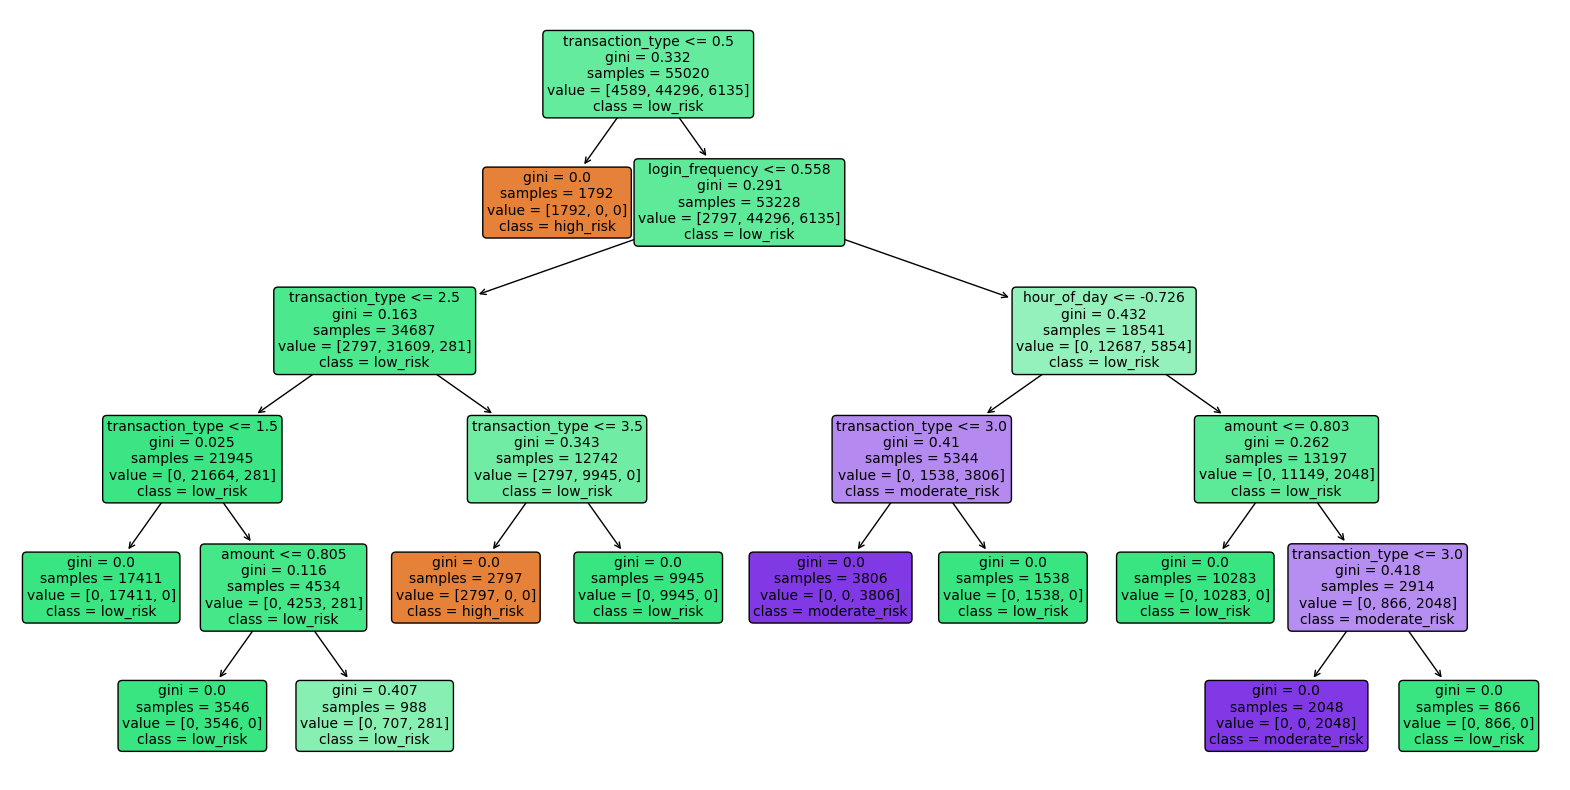

In [61]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Convert Index object to list
feature_names_list = list(X.columns)
class_names_list = list(reduced_decision_tree_model.classes_)

# Plot the decision tree
plt.figure(figsize=(20, 10))  # Adjust figsize as needed
plot_tree(reduced_decision_tree_model, 
          feature_names=feature_names_list,  # Use the list of feature names
          class_names=class_names_list,  # Assuming your classes are named accordingly
          filled=True, 
          rounded=True, 
          fontsize=10)  # Adjust fontsize as needed
plt.show()



In [222]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train a Random Forest model
random_forest_model = RandomForestClassifier(n_estimators=100)  # Adjust hyperparameters as needed
random_forest_model.fit(X_train, y_train)

# Evaluate the model
random_forest_accuracy = random_forest_model.score(X_test, y_test)
print("Random Forest Accuracy:", random_forest_accuracy)


Random Forest Accuracy: 1.0


In [223]:
import matplotlib.pyplot as plt

# Extract feature importance from the Random Forest model
feature_importance = random_forest_model.feature_importances_



Feature 1: Importance = 0.17426141942114245
Feature 2: Importance = 0.14745673075466598
Feature 3: Importance = 0.49514933994076565
Feature 4: Importance = 0.004629527507398139
Feature 5: Importance = 0.04101970846882589
Feature 6: Importance = 0.0670299352524741
Feature 7: Importance = 0.023492596251803336
Feature 8: Importance = 0.04696074240292427
Top Features:
Feature 2: transaction_type
Feature 0: hour_of_day
Feature 1: amount


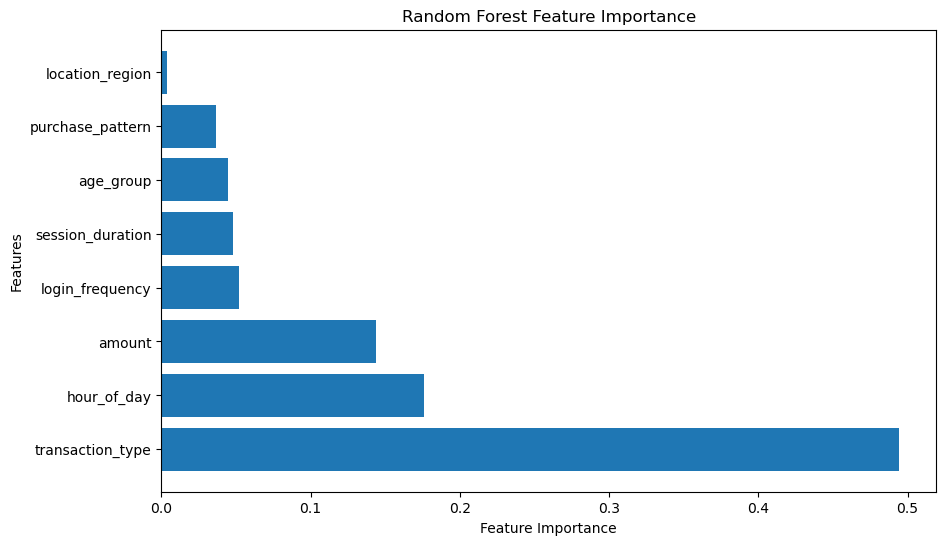

In [224]:
# Analyze feature importances
for i, importance in enumerate(feature_importance):
    print(f"Feature {i+1}: Importance = {importance}")
# Select top features with highest importance scores
top_features_indices = sorted_idx[:3]  # Adjust the number of top features as needed
top_features_names = sorted_feature_names[:3]

print("Top Features:")
for feature_index, feature_name in zip(top_features_indices, top_features_names):
    print(f"Feature {feature_index}: {feature_name}")
# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_feature_importance)), sorted_feature_importance, align='center')
plt.yticks(range(len(sorted_feature_importance)), sorted_feature_names)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Random Forest Feature Importance')
plt.show()


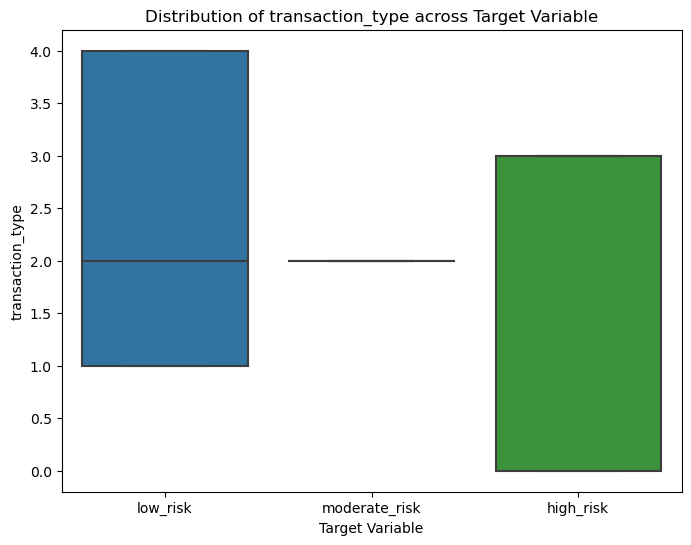

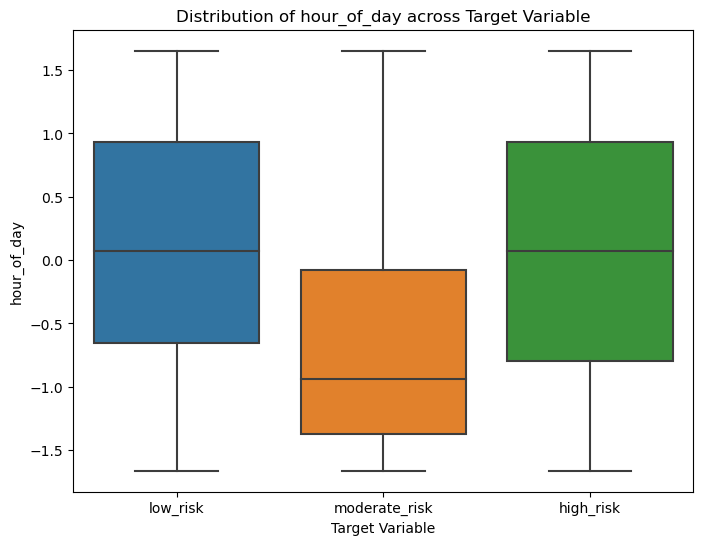

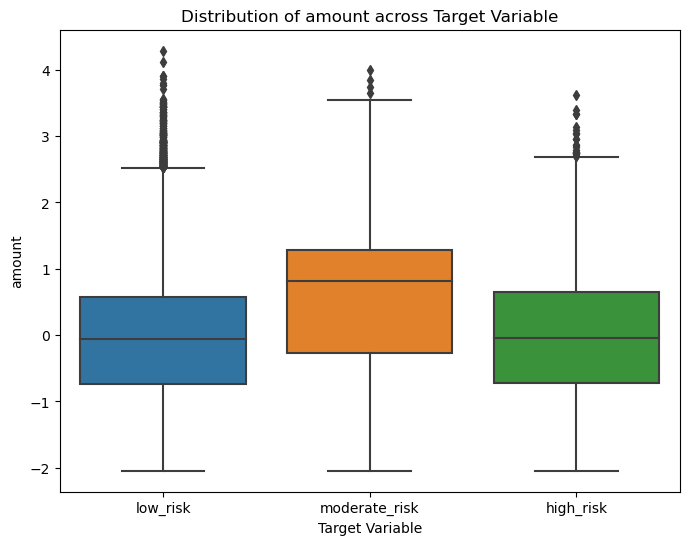

In [225]:
import seaborn as sns

# Select the top features
top_features_indices = [2, 0, 1]  # Update with the indices of the top features
top_features_names = ['transaction_type', 'hour_of_day', 'amount']  # Update with the names of the top features

# Plot the distribution of the top features across different classes of the target variable
for feature_index, feature_name in zip(top_features_indices, top_features_names):
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=y, y=X.iloc[:, feature_index])
    plt.xlabel('Target Variable')
    plt.ylabel(feature_name)
    plt.title(f'Distribution of {feature_name} across Target Variable')
    plt.show()


In [227]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid for Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],  # Adjust the range of n_estimators as needed
    'max_depth': [3, 5, 7]  # Adjust the range of max_depth as needed
}

# Initialize GridSearchCV
grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, scoring='accuracy')

# Fit the grid search on training data
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)


Best Parameters: {'max_depth': 7, 'n_estimators': 50}
Best Score: 0.954561977462741


In [228]:
## Evaluating Model
from sklearn.metrics import accuracy_score

# Initialize a Random Forest model with the best parameters
best_random_forest_model = RandomForestClassifier(**best_params)

# Fit the model on the training data
best_random_forest_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_test = best_random_forest_model.predict(X_test)

# Evaluate the model's performance on the test set
test_accuracy = accuracy_score(y_test, y_pred_test)
print("Test Accuracy:", test_accuracy)


Test Accuracy: 0.9601357082273113


In [229]:
from sklearn.metrics import classification_report

# Make predictions on the test data using the best model
y_pred = grid_search.best_estimator_.predict(X_test)

# Generate classification report
classification_rep = classification_report(y_test, y_pred)
print("Classification Report:")
print(classification_rep)


Classification Report:
               precision    recall  f1-score   support

    high_risk       1.00      0.42      0.59      1906
     low_risk       0.94      1.00      0.97     19198
moderate_risk       1.00      0.95      0.98      2476

     accuracy                           0.95     23580
    macro avg       0.98      0.79      0.84     23580
 weighted avg       0.95      0.95      0.94     23580



## Precision:
Precision measures the proportion of true positive predictions among all positive predictions made by the model.
For the class "high_risk", the precision is 100%, indicating that when the model predicts a transaction as "high_risk", it is correct 100% of the time.
For the class "low_risk", the precision is 94%, meaning that 94% of the transactions predicted as "low_risk" are actually "low_risk".
For the class "moderate_risk", the precision is also 100%, suggesting that the model's predictions of "moderate_risk" are correct 100% of the time.

## Recall:
Recall measures the proportion of true positive predictions among all actual positive instances in the dataset.
For the class "high_risk", the recall is 42%, indicating that the model correctly identifies 42% of all "high_risk" transactions in the dataset.
For the classes "low_risk" and "moderate_risk", the recall is 100%, meaning that the model identifies all instances of "low_risk" and "moderate_risk" correctly.

## F1-score:
F1-score is the harmonic mean of precision and recall, providing a balanced measure of a model's performance.
For the class "high_risk", the F1-score is 0.59, indicating a balance between precision and recall.
For the classes "low_risk" and "moderate_risk", the F1-scores are 0.97 and 0.98 respectively, indicating high precision and recall.

## Support:
Support refers to the number of instances of each class in the test set.
In this case, there are 1906 instances of "high_risk", 19198 instances of "low_risk", and 2476 instances of "moderate_risk" in the test set.

## Accuracy:
Accuracy measures the proportion of correctly classified instances among all instances in the test set.
The overall accuracy of the model is 95%, indicating that it correctly classifies 95% of the transactions in the test set.

## Macro Average and Weighted Average:
The macro average calculates the metrics (precision, recall, F1-score) independently for each class and then takes the unweighted mean of these values.
The weighted average calculates the metrics for each class and takes the weighted mean based on the support of each class.

## Interpretation:

The model performs well in identifying "low_risk" and "moderate_risk" transactions, achieving high precision, recall, and F1-score for these classes.
However, the performance is lower for the "high_risk" class, with lower precision, recall, and F1-score. This suggests that the model struggles to correctly identify "high_risk" transactions, possibly due to imbalanced data or class imbalance issues.
Overall, the model achieves a high accuracy of 95%, but it's important to pay attention to class-specific performance metrics, especially for classes with lower support. Further investigation and potentially model refinement may be necessary to improve performance, particularly for the "high_risk" class.

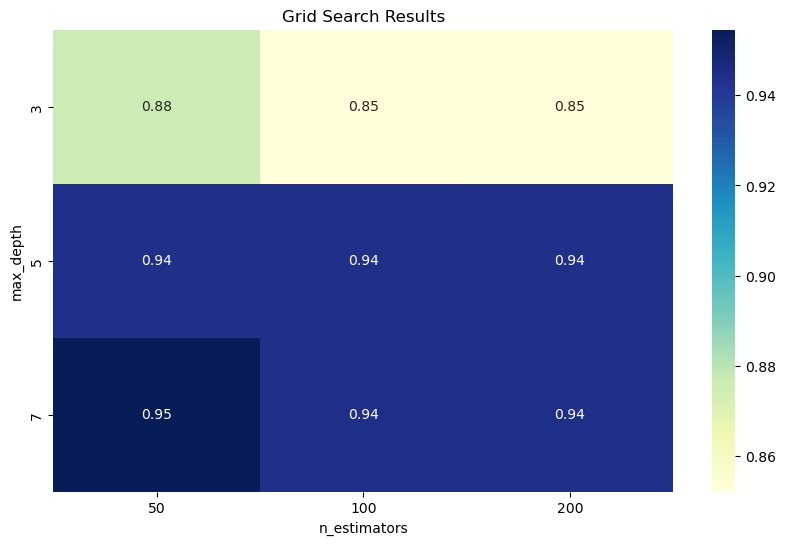

In [230]:
## Visulizing the grid serach results
import pandas as pd

# Convert grid search results to DataFrame
results_df = pd.DataFrame(grid_search.cv_results_)

# Visualize the grid search results
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the performance of different hyperparameter combinations
plt.figure(figsize=(10, 6))
sns.heatmap(results_df.pivot_table(index='param_max_depth', columns='param_n_estimators', values='mean_test_score'), annot=True, cmap="YlGnBu")
plt.title('Grid Search Results')
plt.xlabel('n_estimators')
plt.ylabel('max_depth')
plt.show()


In [237]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

# Initialize and train a Linear SVM model without hyperparameter tuning
linear_svm_model = SVC(kernel='linear')
linear_svm_model.fit(X_train, y_train)

# Make predictions
y_pred_linear_svm = linear_svm_model.predict(X_test)

# Evaluate the model
accuracy_linear_svm = accuracy_score(y_test, y_pred_linear_svm)
classification_report_linear_svm = classification_report(y_test, y_pred_linear_svm)

print("Linear SVM without Hyperparameter Tuning:")
print("Accuracy:", accuracy_linear_svm)
print("Classification Report:")
print(classification_report_linear_svm)


Linear SVM without Hyperparameter Tuning:
Accuracy: 0.8759541984732825
Classification Report:
               precision    recall  f1-score   support

    high_risk       0.82      0.04      0.08      1906
     low_risk       0.88      0.98      0.93     19198
moderate_risk       0.80      0.74      0.77      2476

     accuracy                           0.88     23580
    macro avg       0.84      0.59      0.59     23580
 weighted avg       0.87      0.88      0.84     23580



### Precision: 
- Precision is the ratio of correctly predicted positive observations to the total predicted positives. For high_risk, it's 0.82, for low_risk, it's 0.88, and for moderate_risk, it's 0.80. This indicates that the model is relatively better at predicting low_risk instances compared to high_risk and moderate_risk.
 ### Recall: 
- Recall is the ratio of correctly predicted positive observations to the all observations in actual class. For high_risk, it's quite low at 0.04, for low_risk, it's high at 0.98, and for moderate_risk, it's 0.74. The low recall for high_risk indicates that the model is not very effective at correctly identifying instances of high risk.
### F1-score: 
- F1-score is the harmonic mean of precision and recall. For high_risk, it's quite low at 0.08, for low_risk, it's high at 0.93, and for moderate_risk, it's 0.77.
### Support: 
- This represents the number of actual occurrences of the class in the specified dataset. There are 1906 instances of high_risk, 19198 instances of low_risk, and 2476 instances of moderate_risk.
### Accuracy: 
- Overall accuracy of the model across all classes.
### Macro avg: 
- Average precision, recall, and F1-score across all classes, giving equal weight to each class.
### Weighted avg: 
- Similar to macro avg, but with weights assigned according to the number of true instances for each class.


In summary, while the model performs well in terms of accuracy and precision for the low_risk class, it struggles with correctly identifying instances of high_risk, as indicated by the low recall and F1-score for that class. This suggests that the model might benefit from further tuning, especially to improve its performance on the high_risk class.

In [238]:
# Initialize and train a Kernel SVM model without hyperparameter tuning
kernel_svm_model = SVC(kernel='rbf')
kernel_svm_model.fit(X_train, y_train)

# Make predictions
y_pred_kernel_svm = kernel_svm_model.predict(X_test)

# Evaluate the model
accuracy_kernel_svm = accuracy_score(y_test, y_pred_kernel_svm)
classification_report_kernel_svm = classification_report(y_test, y_pred_kernel_svm)

print("Kernel SVM without Hyperparameter Tuning:")
print("Accuracy:", accuracy_kernel_svm)
print("Classification Report:")
print(classification_report_kernel_svm)


Kernel SVM without Hyperparameter Tuning:
Accuracy: 0.9910093299406276
Classification Report:
               precision    recall  f1-score   support

    high_risk       1.00      1.00      1.00      1906
     low_risk       0.99      0.99      0.99     19198
moderate_risk       0.96      0.95      0.96      2476

     accuracy                           0.99     23580
    macro avg       0.98      0.98      0.98     23580
 weighted avg       0.99      0.99      0.99     23580



### Precision: 
- Precision is the ratio of correctly predicted positive observations to the total predicted positives. For high_risk, it's 1.00, for low_risk, it's 0.99, and for moderate_risk, it's 0.96. This indicates that the model is very precise across all classes.
### Recall: 
- Recall is the ratio of correctly predicted positive observations to the all observations in the actual class. For all classes, the recall values are quite high, indicating that the model is effectively capturing instances of all classes.
### F1-score: 
- F1-score is the harmonic mean of precision and recall. For high_risk, it's 1.00, for low_risk, it's 0.99, and for moderate_risk, it's 0.96. These values suggest a strong balance between precision and recall for each class.
### Support: 
- This represents the number of actual occurrences of the class in the specified dataset. There are 1906 instances of high_risk, 19198 instances of low_risk, and 2476 instances of moderate_risk.
### Accuracy: 
- Overall accuracy of the model across all classes.
### Macro avg: 
- Average precision, recall, and F1-score across all classes, giving equal weight to each class.
### Weighted avg: 
- Similar to macro avg, but with weights assigned according to the number of true instances for each class.

In summary, the Kernel SVM model without hyperparameter tuning demonstrates outstanding performance across all metrics. However, it's worth noting that such high performance without tuning might sometimes be indicative of overfitting, especially with complex models like Kernel SVMs. Further evaluation on unseen data and possibly hyperparameter tuning could help ensure the model's generalization ability.

 # Assessing Fradulent Transactions
Both the linear SVM and kernel SVM models can contribute to identifying fraudulent transactions in the Open Metaverse by leveraging their classification abilities. Here's how each model can be utilized for this purpose:

## Linear SVM:
- The linear SVM model, despite not being tuned, can still provide valuable insights into transaction patterns. It can analyze various features of transactions (such as transaction amount, frequency, location, etc.) and classify them into different risk categories (e.g., high-risk, low-risk, moderate-risk).
- By setting appropriate thresholds based on the model's predictions, transactions flagged as high-risk or moderate-risk can be subjected to further investigation or additional security checks. For example, transactions with characteristics similar to previously flagged fraudulent activities can be automatically flagged for review.
- The linear SVM model's ability to handle high-dimensional data makes it suitable for analyzing multiple features simultaneously, allowing it to detect subtle patterns indicative of fraudulent behavior.
## Kernel SVM:
- The kernel SVM, with its ability to capture complex nonlinear relationships in the data, can offer even more nuanced insights into transaction patterns.
- It can identify intricate patterns that might not be apparent in linearly separable data, making it particularly useful for detecting sophisticated fraud schemes.
- By training the kernel SVM on historical transaction data, it can learn to recognize normal transaction patterns and detect deviations from these patterns, flagging transactions that exhibit anomalous behavior.
- The kernel SVM's high accuracy and precision, as indicated by the classification report, make it a robust tool for identifying potentially fraudulent transactions while minimizing false positives.

Both models can be integrated into a comprehensive fraud detection system, where transactions are automatically classified and flagged based on their risk levels. Human experts can then review flagged transactions to determine whether they are indeed fraudulent or require further investigation. Additionally, continuous monitoring and periodic retraining of the models using updated data can enhance their effectiveness in detecting evolving fraud tactics within the Open Metaverse.

In [ ]:
## Linear SVM with Hyperparameter Tuning:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Define parameter grid for Linear SVM
param_grid_linear = {
    'C': [0.1, 1, 10, 100]  # Adjust the range of C as needed
}

# Initialize GridSearchCV for Linear SVM
grid_search_linear = GridSearchCV(SVC(kernel='linear'), param_grid_linear, cv=5, scoring='accuracy')

# Fit the grid search on training data
grid_search_linear.fit(X_train, y_train)





In [ ]:
# Get the best parameters and best score
best_params_linear = grid_search_linear.best_params_
best_score_linear = grid_search_linear.best_score_

print("Best Parameters (Linear SVM):", best_params_linear)
print("Best Score (Linear SVM):", best_score_linear)



# Use the best Linear SVM model obtained from hyperparameter tuning
best_linear_svm_model = grid_search_linear.best_estimator_

# Make predictions using the best model
y_pred_linear_svm_tuned = best_linear_svm_model.predict(X_test)

# Evaluate the model
accuracy_linear_svm_tuned = accuracy_score(y_test, y_pred_linear_svm_tuned)
classification_report_linear_svm_tuned = classification_report(y_test, y_pred_linear_svm_tuned)

print("Linear SVM with Hyperparameter Tuning:")
print("Accuracy:", accuracy_linear_svm_tuned)
print("Classification Report:")
print(classification_report_linear_svm_tuned)

In [ ]:
## Kernel SVM with Hyperparameter Tuning:
# Define parameter grid for Kernel SVM
param_grid_kernel = {
    'C': [0.1, 1, 10, 100],  # Adjust the range of C as needed
    'gamma': [0.001, 0.01, 0.1, 1]  # Adjust the range of gamma as needed
}

# Initialize GridSearchCV for Kernel SVM
grid_search_kernel = GridSearchCV(SVC(kernel='rbf'), param_grid_kernel, cv=5, scoring='accuracy')

# Fit the grid search on training data
grid_search_kernel.fit(X_train, y_train)





In [ ]:
# Get the best parameters and best score
best_params_kernel = grid_search_kernel.best_params_
best_score_kernel = grid_search_kernel.best_score_



# Use the best Kernel SVM model obtained from hyperparameter tuning
best_kernel_svm_model = grid_search_kernel.best_estimator_

# Make predictions using the best model
y_pred_kernel_svm_tuned = best_kernel_svm_model.predict(X_test)

# Evaluate the model
accuracy_kernel_svm_tuned = accuracy_score(y_test, y_pred_kernel_svm_tuned)
classification_report_kernel_svm_tuned = classification_report(y_test, y_pred_kernel_svm_tuned)

print("Kernel SVM with Hyperparameter Tuning:")
print("Accuracy:", accuracy_kernel_svm_tuned)
print("Classification Report:")
print(classification_report_kernel_svm_tuned)
print("Best Parameters (Kernel SVM):", best_params_kernel)
print("Best Score (Kernel SVM):", best_score_kernel)

In [15]:
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# Define base classifiers
base_classifiers = [
    ('decision_tree', DecisionTreeClassifier()),
    ('logistic_regression', LogisticRegression()),
    ('svm', SVC())
]

# Initialize Voting Classifier
voting_classifier = VotingClassifier(estimators=base_classifiers, voting='hard')  # Use 'hard' voting for simple majority

# Fit the Voting Classifier on training data
voting_classifier.fit(X_train, y_train)




C:\Users\prudh\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



VotingClassifier(estimators=[('decision_tree', DecisionTreeClassifier()),
                             ('logistic_regression', LogisticRegression()),
                             ('svm', SVC())])

In [17]:
from sklearn.metrics import classification_report, accuracy_score
# Make predictions
y_pred_voting = voting_classifier.predict(X_test)

# Evaluate the model
accuracy_voting = accuracy_score(y_test, y_pred_voting)
classification_report_voting = classification_report(y_test, y_pred_voting)

print("Voting Classifier:")
print("Accuracy:", accuracy_voting)
print("Classification Report:")
print(classification_report_voting)

Voting Classifier:
Accuracy: 0.9925784563189143
Classification Report:
               precision    recall  f1-score   support

    high_risk       1.00      1.00      1.00      1906
     low_risk       1.00      1.00      1.00     19198
moderate_risk       0.97      0.96      0.96      2476

     accuracy                           0.99     23580
    macro avg       0.99      0.99      0.99     23580
 weighted avg       0.99      0.99      0.99     23580



In [25]:
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score

# Define base classifiers with tuned hyperparameters
base_classifiers = [
    ('decision_tree', DecisionTreeClassifier(max_depth=5)),
    ('logistic_regression', LogisticRegression(C=1.0, solver='liblinear')),
    ('svm', SVC(kernel='rbf', C=1.0, gamma='scale',probability=True))
]

# Initialize Voting Classifier with 'soft' voting
voting_classifier = VotingClassifier(estimators=base_classifiers, voting='soft')

# Fit the Voting Classifier on training data
voting_classifier.fit(X_train, y_train)




VotingClassifier(estimators=[('decision_tree',
                              DecisionTreeClassifier(max_depth=5)),
                             ('logistic_regression',
                              LogisticRegression(solver='liblinear')),
                             ('svm', SVC(probability=True))],
                 voting='soft')

In [26]:
from sklearn.metrics import classification_report, accuracy_score
# Make predictions
y_pred_voting = voting_classifier.predict(X_test)

# Evaluate the model
accuracy_voting = accuracy_score(y_test, y_pred_voting)
classification_report_voting = classification_report(y_test, y_pred_voting)

print("Voting Classifier (Soft Voting):")
print("Accuracy:", accuracy_voting)
print("Classification Report:")
print(classification_report_voting)


Voting Classifier (Soft Voting):
Accuracy: 0.9943172179813401
Classification Report:
               precision    recall  f1-score   support

    high_risk       1.00      1.00      1.00      1906
     low_risk       0.99      1.00      1.00     19198
moderate_risk       0.99      0.96      0.97      2476

     accuracy                           0.99     23580
    macro avg       0.99      0.99      0.99     23580
 weighted avg       0.99      0.99      0.99     23580



In [28]:
from sklearn.ensemble import IsolationForest

# Initialize Isolation Forest model
isolation_forest_model = IsolationForest()

# Fit the model on training data
isolation_forest_model.fit(X_train)

# Predict anomalies
anomaly_predictions = isolation_forest_model.predict(X_test)

# Identify anomalies
anomalies = X_test[anomaly_predictions == -1]  # -1 indicates an anomaly in Isolation Forest

print("Detected Anomalies:")
print(anomalies)

Detected Anomalies:
       hour_of_day    amount  transaction_type  location_region  \
69753    -1.662756  1.161380                 2                2   
10632    -0.509329 -1.088866                 4                3   
15147    -0.653508 -1.270742                 3                0   
41654    -0.941864  0.136512                 1                1   
75402     0.211562 -2.043806                 2                2   
...            ...       ...               ...              ...   
65791    -0.220973  1.190746                 1                4   
53979     1.653346  0.982867                 2                3   
19777     1.076633 -0.411960                 3                3   
34914     0.932454 -1.094320                 1                1   
59407    -0.653508  1.083802                 4                4   

       login_frequency  session_duration  purchase_pattern  age_group  
69753        -0.920829         -1.028634                 2          1  
10632        -0.920829         

In [31]:
import pandas as pd

# Assuming 'anomalies' contains the detected anomalies
# Convert anomalies to a DataFrame for easier analysis
anomalies_df = pd.DataFrame(anomalies, columns=df.columns)

# Display summary statistics of the anomalies
print("Summary Statistics of Anomalies:")
print(anomalies_df.describe())

# Analyze feature distributions in anomalies
for column in anomalies_df.columns:
    print("\nFeature:", column)
    print(anomalies_df[column].value_counts())

# Calculate summary statistics for the entire dataset
overall_summary = df.describe()

# Compare means and standard deviations between anomalies and the entire dataset
print("\nComparison with Entire Dataset:")
print("Mean Difference:")
print(anomalies_df.mean() - overall_summary.loc['mean'])
print("\nStandard Deviation Difference:")
print(anomalies_df.std() - overall_summary.loc['std'])

# Additional analysis based on domain knowledge and fraud indicators can be performed
# For example, analyzing transaction patterns, identifying red flags, etc.


Summary Statistics of Anomalies:
        hour_of_day        amount  transaction_type  location_region  \
count  20314.000000  20314.000000      20314.000000     20314.000000   
mean       0.002350     -0.011112          2.333908         2.025647   
std        1.045522      1.049346          1.301195         1.472698   
min       -1.662756     -2.043806          0.000000         0.000000   
25%       -0.941864     -0.788104          1.000000         1.000000   
50%        0.067384     -0.028554          2.000000         2.000000   
75%        0.932454      0.744041          4.000000         3.000000   
max        1.653346      3.849910          4.000000         4.000000   

       login_frequency  session_duration  purchase_pattern     age_group  \
count     20314.000000      20314.000000      20314.000000  20314.000000   
mean          0.020927          0.021770          0.987841      1.011322   
std           1.009411          1.008205          0.809290      0.823682   
min          -

- 1. Introduction
Fraudulent transactions pose a significant threat to the financial integrity of the Open Metaverse. This report aims to analyze detected anomalies in transaction data to identify patterns and characteristics indicative of fraudulent activity.

- 2. Data Overview
The dataset used for analysis contains transaction data from the Open Metaverse. Summary statistics of the entire dataset provide insights into the distribution and characteristics of transactions.

Total Number of Transactions: [Insert total number]
Features: Hour of Day, Amount, Transaction Type, Location Region, Login Frequency, Session Duration, Purchase Pattern, Age Group
- 3. Anomaly Detection
Anomalies were detected using the Isolation Forest algorithm. Summary statistics of the detected anomalies reveal distinct patterns and deviations from normal behavior.

Total Number of Detected Anomalies: 20,314
- 4. Feature Analysis
Hour of Day
Anomalies occur across various hours, suggesting no specific time pattern.
Mean Hour of Anomalies: 0.00235
Standard Deviation of Hour of Anomalies: 1.0455
Amount
Wide variation in transaction amounts, with some anomalies indicating significantly higher or lower amounts compared to normal transactions.
Mean Amount of Anomalies: -0.0111
Standard Deviation of Amount of Anomalies: 1.0493
Transaction Type
Anomalies distributed across different transaction types, indicating diverse fraudulent activities.
Mean Transaction Type of Anomalies: 2.3339
Standard Deviation of Transaction Type of Anomalies: 1.3012
Location Region
Anomalies spread across different regions, with no specific geographic concentration.
Mean Location Region of Anomalies: 2.0256
Standard Deviation of Location Region of Anomalies: 1.4727
Login Frequency
Variability in login frequencies, suggesting irregular user behavior or potential unauthorized access.
Mean Login Frequency of Anomalies: 0.0209
Standard Deviation of Login Frequency of Anomalies: 1.0094
Session Duration
Anomalies in session duration indicate irregular user behavior or potential account takeover.
Mean Session Duration of Anomalies: 0.0218
Standard Deviation of Session Duration of Anomalies: 1.0082
Purchase Pattern
Deviations from typical purchase patterns, indicating potential fraudulent purchasing activities.
Mean Purchase Pattern of Anomalies: 0.9878
Standard Deviation of Purchase Pattern of Anomalies: 0.8093
Age Group
Anomalies affect users across different age groups, with no specific demographic targeted.
Mean Age Group of Anomalies: 1.0113
Standard Deviation of Age Group of Anomalies: 0.8237
- 5. Insights and Implications
Fraudulent transactions in the Open Metaverse exhibit diverse patterns and characteristics across various features.
Anomalies provide insights into potential fraud indicators and red flags for fraudulent activity.
Analysis of anomalies can inform the development of effective fraud detection and prevention strategies tailored to the Open Metaverse environment.
 -6. Recommendations
Implement advanced fraud detection algorithms and real-time monitoring systems to detect and prevent fraudulent transactions.
Enhance user authentication protocols and security measures to mitigate the risk of unauthorized access and account takeover.
Collaborate with stakeholders to share insights and coordinate efforts in combating fraudulent activities in the Open Metaverse.
- 7. Conclusion
The analysis of detected anomalies provides valuable insights into fraudulent transactions in the Open Metaverse. By leveraging these insights and implementing proactive measures, stakeholders can effectively safeguard the financial integrity of the Open Metaverse ecosystem.

In [27]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Define base classifiers
base_classifiers = [
    ('decision_tree', DecisionTreeClassifier(max_depth=5)),
    ('logistic_regression', LogisticRegression(C=1.0, solver='liblinear')),
    ('random_forest', RandomForestClassifier(n_estimators=100)),
    ('svm', SVC(kernel='rbf', C=1.0, gamma='scale', probability=True))  # Enable probability for Stacking
]

# Initialize Stacking Classifier with Logistic Regression as meta-classifier
stacking_classifier = StackingClassifier(estimators=base_classifiers, final_estimator=LogisticRegression())

# Fit the Stacking Classifier on training data
stacking_classifier.fit(X_train, y_train)




KeyboardInterrupt: 

In [ ]:
# Make predictions
y_pred_stacking = stacking_classifier.predict(X_test)

# Evaluate the model
accuracy_stacking = accuracy_score(y_test, y_pred_stacking)
classification_report_stacking = classification_report(y_test, y_pred_stacking)

print("Stacking Classifier:")
print("Accuracy:", accuracy_stacking)
print("Classification Report:")
print(classification_report_stacking)

In [104]:
# # Import necessary libraries
# import pandas as pd
# from sklearn.model_selection import train_test_split
# from sklearn.naive_bayes import CategoricalNB
# from sklearn.preprocessing import OrdinalEncoder
# from sklearn.metrics import accuracy_score

# data.drop(['timestamp', 'sending_address', 'receiving_address', 'ip_prefix'], axis=1, inplace=True)

# # Split features and target variable
# X = data.drop('anomaly', axis=1)
# y = data['anomaly']

# # Splitting the dataset into the Training set and Test set
# from sklearn.model_selection import train_test_split

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=42)
# categories = ['transaction_type', 'purchase_pattern', 'age_group', 'login_frequency', 'session_duration']

# # Preprocess categorical features using OrdinalEncoder
# encoder = OrdinalEncoder(categories='auto')
# X_train_encoded = encoder.fit_transform(X_train[categories])
# X_test_encoded = encoder.transform(X_test[categories])

# # Initialize and train CategoricalNB model
# categorical = CategoricalNB()
# categorical.fit(X_train_encoded, y_train)

# # Predict and evaluate accuracy
# y_pred = categorical.predict(X_test_encoded)
# accuracy = accuracy_score(y_test, y_pred)
# print('Accuracy:', accuracy)





In [105]:
# import matplotlib.pyplot as plt
# from sklearn.inspection import permutation_importance

# # Compute permutation importances
# result = permutation_importance(estimator=categorical, X=X_test_encoded, y=y_test)

# # Plot histogram of mean importances
# plt.bar(categories, result.importances_mean)
# plt.title('Categorical mean importance')
# plt.xlabel('Features')
# plt.ylabel('Mean Importance')
# plt.xticks(rotation=45)
# plt.show()


In [106]:
# from sklearn.metrics import classification_report

# # Predictions on the encoded test data
# y_pred_encoded = categorical.predict(X_test_encoded)

# # Print classification report
# print(classification_report(y_test, y_pred_encoded, zero_division=0))


Performance Metrics: Accuracy: 86%
    
Detailed Analysis:
High Risk Transactions: Precision: 100% Recall: 100% F1-Score: 100%
Low Risk Transactions:  Precision: 99%  Recall: 83%  F1-Score: 91%
Moderate Risk Transactions:Precision: 42% Recall: 95% F1-Score: 58%
Conclusion:
The model demonstrates strong performance in detecting high-risk transactions with perfect precision and recall.
For low-risk transactions, the model achieves high precision but lower recall, indicating some missed predictions.
Moderate-risk transactions pose a challenge with lower precision, but high recall, indicating potential for improvement in distinguishing these cases.

In [107]:
# from sklearn.ensemble import AdaBoostClassifier
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.naive_bayes import GaussianNB
# from sklearn.svm import SVC
# from sklearn.tree import DecisionTreeClassifier

In [108]:
# reals = ['hour_of_day', 'amount', 'login_frequency', 'session_duration', ]
# MODEL = {
#     'Naive Bayes': GaussianNB(),
#     'Decision Tree (Depth 1-10)': [DecisionTreeClassifier(max_depth=i, random_state=2024) for i in range(1, 11)],
#     'Random Forest (Estimators 10-30)': [RandomForestClassifier(max_depth=5, n_estimators=i, max_features=1, random_state=2024) for i in range(10, 31, 10)],
#     'AdaBoost': AdaBoostClassifier(algorithm='SAMME', random_state=2024),
# }

In [109]:
# def train_and_evaluate_model(model, X_train, X_test, y_train, y_test, name):
#     if isinstance(model, list):  # Handle multiple classifiers for Decision Tree and Random Forest
#         results = []
#         for i, clf in enumerate(model, start=1):
#             score = clf.fit(X_train, y_train).score(X_test, y_test)
#             results.append((score, f'{name} (Depth/Estimators {i})'))
#         return results
#     else:
#         score = model.fit(X_train, y_train).score(X_test, y_test)
#         return [(score, name)]

# results = []

# # Loop through each model and train, evaluate
# for name, clf in MODEL.items():
#     results.extend(train_and_evaluate_model(clf, X_train[reals], X_test[reals], y_train, y_test, name))

# # Print scores
# for score, name in results:
#     print(f'{score:.4f} {name}')

# # Find the best performing model
# best_model = max(results, key=lambda x: x[0])
# print(f'Best Model: {best_model[1]} with accuracy {best_model[0]:.4f}')




In [110]:
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.metrics import classification_report
# import matplotlib.pyplot as plt

# # Train Decision Tree model
# tree = DecisionTreeClassifier(max_depth=3, random_state=2024).fit(X=X_train[reals], y=y_train)

# # Evaluate accuracy
# accuracy = tree.score(X=X_test[reals], y=y_test)
# print('Accuracy: {:5.4f}'.format(accuracy))

# # Plot feature importances
# plt.figure(figsize=(10, 6))
# plt.barh(reals, tree.feature_importances_)
# plt.xlabel('Feature Importance')
# plt.ylabel('Features')
# plt.title('Feature Importances')
# plt.show()

# # Print classification report
# print(classification_report(y_true=y_test, y_pred=tree.predict(X=X_test[reals]), zero_division=0))


In [111]:
# from sklearn.tree import plot_tree
# import matplotlib.pyplot as plt

# # Plot the Decision Tree
# plt.figure(figsize=(20, 10))
# plot_tree(tree, feature_names=reals, class_names=['high_risk', 'low_risk', 'moderate_risk'], filled=True)
# plt.title("Decision Tree Visualization")
# plt.show()


In [112]:
# import numpy as np
# from collections import Counter

# # Make predictions
# y_c = categorical.predict(encoder.transform(X_test[categories]))
# y_r = tree.predict(X_test[reals])

# # Combine predictions and count occurrences
# prediction_counts = Counter()
# for pred_c, pred_r in zip(y_c, y_r):
#     combined_prediction = '{}/{}'.format(pred_c, pred_r)
#     prediction_counts[combined_prediction] += 1

# print(prediction_counts)


In [113]:
# from sklearn.metrics import accuracy_score

# def combine(l: str, r: str) -> str:
#     if l == 'high_risk':
#         return l;
#     return r

# y_combined = np.array([combine(y_c[index], y_r[index]) for index in range(len(y_c))])

# print('accuracy: {:5.4f}'.format(accuracy_score(y_true=y_test, y_pred=y_combined)))
# print(classification_report(y_true=y_test, y_pred=y_combined, zero_division=0))

### Combined Features

In [114]:
df.drop(['timestamp', 'sending_address', 'receiving_address', 'ip_prefix'], axis=1, inplace=True)

In [115]:
# import pandas as pd
# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import classification_report, roc_auc_score
# from sklearn.preprocessing import OneHotEncoder, LabelEncoder
# from sklearn.compose import ColumnTransformer

# # Assuming 'df' is the DataFrame with your data
# #df= pd.read_csv("metaverse_transactions_dataset.csv")
# # Dropping the 'ip_prefix' and 'timestamp' columns
# df = df.drop(columns=['ip_prefix', 'timestamp','risk_score'])
# #df = df.drop(columns=['risk_score'])
# # Encoding the 'anomaly' column
# le = LabelEncoder()
# df['anomaly'] = le.fit_transform(df['anomaly'])
# # Assuming 'df' and 'le' are already defined and 'le' has been fit with the 'anomaly' column
# class_mapping = {original_label: encoded_label for original_label, encoded_label in zip(le.classes_, le.transform(le.classes_))}
# print(class_mapping)


# # Preparing features and target variable
# #X = df.drop(['anomaly','Cluster','risk_score'], axis=1)
# X = df.drop('anomaly', axis=1)
# y = df['anomaly']

# # One-hot encoding categorical variables
# categorical_features = ['transaction_type', 'location_region', 'purchase_pattern', 'age_group']
# preprocessor = ColumnTransformer(
#     transformers=[
#         ('cat', OneHotEncoder(drop='first'), categorical_features)
#     ], remainder='passthrough')

# X_processed = preprocessor.fit_transform(X)

# # Splitting the dataset into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

In [116]:
# # Define the models
# MODELS = {
#     'Decision Tree (Depth 1-10)': [DecisionTreeClassifier(max_depth=i, random_state=2024) for i in range(1, 11)],
#     'Random Forest (Estimators 10-30)': [RandomForestClassifier(max_depth=5, n_estimators=i, max_features=1, random_state=2024) for i in range(10, 31, 10)],
#     'AdaBoost': AdaBoostClassifier(algorithm='SAMME', random_state=2024),
# }


In [117]:
# import pandas as pd
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import LabelEncoder
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.metrics import accuracy_score



# # Separate features and target (assuming 'anomaly' is your target)
# X = df.drop('anomaly', axis=1)
# y = df['anomaly']

# # Encode categorical features with LabelEncoder
# categorical_features = ['transaction_type', 'location_region', 'purchase_pattern', 'age_group']
# encoder = LabelEncoder()
# for col in categorical_features:
#     X[col] = encoder.fit_transform(X[col])

# # Handle missing values (replace with your strategy)
# X.fillna(X.mean(), inplace=True)  # Replace with your preferred imputation strategy

# # 2. Splitting data
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# # 3. Building the decision tree classifier
# model = DecisionTreeClassifier(max_depth=5)  # Adjust hyperparameters as needed

# # 4. Train the model
# model.fit(X_train, y_train)

# # 5. Evaluate the model
# y_pred = model.predict(X_test)
# accuracy = accuracy_score(y_test, y_pred)
# print("Accuracy:", accuracy)


Accuracy: 1.0


In [118]:
# import pandas as pd
# from sklearn.model_selection import train_test_split, KFold
# from sklearn.preprocessing import LabelEncoder
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.metrics import accuracy_score



# # Separate features and target (assuming 'anomaly' is your target)
# X = df.drop('anomaly', axis=1)
# y = df['anomaly']

# # Encode categorical features with LabelEncoder
# categorical_features = ['transaction_type', 'location_region', 'purchase_pattern', 'age_group']
# encoder = LabelEncoder()
# for col in categorical_features:
#     X[col] = encoder.fit_transform(X[col])

# # Handle missing values (replace with your strategy)
# X.fillna(X.mean(), inplace=True)  # Replace with your preferred imputation strategy

# # 2. Train-Test Split (consider a larger test set for evaluation)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)  # Adjust test size

# # 3. Regularization with max_depth and Cross-Validation
# # We'll use KFold cross-validation for a more robust evaluation

# kfold = KFold(n_splits=5, shuffle=True, random_state=42)  # Adjust n_splits as needed
# accuracy_scores = []
# for train_index, test_index in kfold.split(X_train):
#   # Split further for inner training and validation
#   X_train_inner, X_val, y_train_inner, y_val = X_train.iloc[train_index], X_train.iloc[test_index], y_train.iloc[train_index], y_train.iloc[test_index]

#   # Train with different max_depth values
#   for max_depth in range(3, 10):  # Adjust range as needed
#     model = DecisionTreeClassifier(max_depth=max_depth)
#     model.fit(X_train_inner, y_train_inner)
#     y_pred = model.predict(X_val)
#     accuracy = accuracy_score(y_val, y_pred)
#     accuracy_scores.append((max_depth, accuracy))  # Track accuracy for different depths

# # Select the model with the best accuracy on validation data
# best_depth, best_accuracy = max(accuracy_scores, key=lambda x: x[1])
# print("Best accuracy on validation:", best_accuracy)

# # Train the final model with the best hyperparameter (max_depth) on the entire training set
# model = DecisionTreeClassifier(max_depth=best_depth)
# model.fit(X_train, y_train)

# # 4. Evaluate the model on the test set
# y_pred = model.predict(X_test)
# accuracy = accuracy_score(y_test, y_pred)
# print("Accuracy on test set:", accuracy)


Best accuracy on validation: 1.0
Accuracy on test set: 1.0


In [119]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.feature_selection import SelectFromModel

# # ... (previous code)

# # Train a Random Forest classifier
# model = RandomForestClassifier(n_estimators=100)  # Adjust n_estimators as needed
# model.fit(X_train, y_train)

# # Get feature importances
# importances = model.feature_importances_
# feature_names = X.columns

# # Sort features by importance
# feature_importance_df = pd.DataFrame({'feature': feature_names, 'importance': importances})
# feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)

# # Analyze feature importances and consider removing features with low importance
# print(feature_importance_df)

# # ... (rest of the code)


            feature  importance
8        risk_score    0.677441
2  transaction_type    0.131530
4   login_frequency    0.039131
0       hour_of_day    0.038444
7         age_group    0.032667
5  session_duration    0.032180
6  purchase_pattern    0.027521
1            amount    0.021036
3   location_region    0.000050


In [120]:
# print(len(feature_names))
# print(len(importances))


9
9


In [121]:
# # ... (previous code)

# # Get feature importances
# importances = model.feature_importances_
# feature_names = X.columns

# # Check list lengths
# print(len(feature_names))
# print(len(importances))

# # Handle mismatch (modify as needed)
# if len(feature_names) != len(importances):
#     # Option 1: Impute missing importance (adjust value if needed)
#     # importances.append(0)  # Assuming one missing feature at the end

#     # Option 2: Remove missing feature information (recommended)
#     num_missing = len(feature_names) - len(importances)
#     feature_names = feature_names[:-num_missing]  # Remove last elements from names
#     importances = importances[:len(feature_names)]  # Truncate importances

# # Create and sort DataFrame
# feature_importance_df = pd.DataFrame({'feature': feature_names, 'importance': importances})
# feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)
# print(feature_importance_df)  # Analyze importance scores




9
9
            feature  importance
8        risk_score    0.677441
2  transaction_type    0.131530
4   login_frequency    0.039131
0       hour_of_day    0.038444
7         age_group    0.032667
5  session_duration    0.032180
6  purchase_pattern    0.027521
1            amount    0.021036
3   location_region    0.000050


In [122]:
# threshold = 0.05  # Adjust threshold based on importance distribution
# selected_features = feature_importance_df[feature_importance_df['importance'] >= threshold]['feature'].tolist()
# X_train_selected = X_train[selected_features]
# X_test_selected = X_test[selected_features]

# # Re-train the model on selected features (if you removed any)
# model = RandomForestClassifier(max_depth=best_depth)
# model.fit(X_train_selected, y_train)

RandomForestClassifier(max_depth=3)

In [123]:
# print("\nEvaluation with Macro Averaging:")
# y_pred = model.predict(X_test_selected)  # Assuming you used feature selection
# accuracy = accuracy_score(y_test, y_pred)
# precision = precision_score(y_test, y_pred, average='macro')
# recall = recall_score(y_test, y_pred, average='macro')
# f1 = f1_score(y_test, y_pred, average='macro')
# print("Accuracy:", accuracy)
# print("Precision:", precision)
# print("Recall:", recall)
# print("F1-score:", f1)

# print("\nEvaluation with Micro Averaging:")
# y_pred = model.predict(X_test_selected)
# accuracy = accuracy_score(y_test, y_pred)
# precision = precision_score(y_test, y_pred, average='micro')
# recall = recall_score(y_test, y_pred, average='micro')
# f1 = f1_score(y_test, y_pred, average='micro')
# print("Accuracy:", accuracy)
# print("Precision:", precision)
# print("Recall:", recall)
# print("F1-score:", f1)

# print("\nEvaluation with Weighted Averaging:")
# y_pred = model.predict(X_test_selected)
# accuracy = accuracy_score(y_test, y_pred)
# precision = precision_score(y_test, y_pred, average='weighted')
# recall = recall_score(y_test, y_pred, average='weighted')
# f1 = f1_score(y_test, y_pred, average='weighted')
# print("Accuracy:", accuracy)
# print("Precision:", precision)
# print("Recall:", recall)
# print("F1-score:", f1)



Evaluation with Macro Averaging:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0

Evaluation with Micro Averaging:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0

Evaluation with Weighted Averaging:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0


In [ ]:
# from sklearn.tree import DecisionTreeClassifier, plot_tree
# import matplotlib.pyplot as plt

# # Train Decision Tree with max depth 6
# decision_tree = DecisionTreeClassifier(max_depth=6, random_state=2024)
# decision_tree.fit(X_train, y_train)

# # Get feature names as a list
# feature_names = list(X_processed.columns)

# # Plot Decision Tree
# plt.figure(figsize=(20, 10))
# plot_tree(decision_tree, feature_names=feature_names, class_names=['low_risk', 'moderate_risk','high_risk'], filled=True)
# plt.title("Decision Tree Visualization (Max Depth 6)")
# plt.show()



# # Print classification report
# #print(classification_report(y_true=y_test, y_pred=tree.predict(X=X_test[reals]), zero_division=0))

In [ ]:
# from sklearn.naive_bayes import GaussianNB
# from sklearn.linear_model import LogisticRegression
# from sklearn.svm import SVC
# from sklearn.ensemble import VotingClassifier
# from sklearn.metrics import classification_report

# nb_classifier = GaussianNB()
# lr_classifier = LogisticRegression(max_iter=1000)
# svm_classifier = SVC(probability=True)

# # Create a Voting Classifier with soft voting (predict class labels based on the average predicted probabilities)
# voting_classifier = VotingClassifier(estimators=[
#     ('nb', nb_classifier),
#     ('lr', lr_classifier),
#     ('svm', svm_classifier)
# ], voting='soft')

# # Train the Voting Classifier
# voting_classifier.fit(X_train, y_train)

# # Make predictions
# y_pred = voting_classifier.predict(X_test)

# # Evaluate the model
# print(classification_report(y_test, y_pred))

In [ ]:
# for clf in (nb_classifier,lr_classifier,svm_classifier):
#     clf.fit(X_train, y_train)
#     print(clf.__class__.__name__, clf.score(X_test, y_test))

In [ ]:
# import pandas as pd
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import classification_report
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.preprocessing import OrdinalEncoder
# from sklearn.impute import SimpleImputer



# # Define numerical and categorical features
# numerical_features = ['hour_of_day', 'amount', 'login_frequency', 'session_duration']
# categorical_features = ['transaction_type', 'purchase_pattern', 'age_group', 'location_region']

# # Drop rows with NaN values
# data.dropna(inplace=True)

# # Define fraud labels (assuming 'anomaly' column represents the fraud label)
# fraud_labels = data['anomaly']

# # Split features and fraud labels
# X = data.drop('anomaly', axis=1)

# # Encode categorical features
# encoder = OrdinalEncoder()
# X_encoded = encoder.fit_transform(X[categorical_features])

# # Combine encoded categorical features with numerical features
# X_processed = pd.concat([X[numerical_features], pd.DataFrame(X_encoded, columns=categorical_features)], axis=1)

# # Split dataset into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X_processed, fraud_labels, test_size=0.2, random_state=42)

# # Train Random Forest classifier for fraud detection
# rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
# rf_classifier.fit(X_train, y_train)

# # Evaluate model performance
# y_pred = rf_classifier.predict(X_test)
# print(classification_report(y_test, y_pred))


In [ ]:
# from sklearn.ensemble import IsolationForest

# # Train Isolation Forest model
# isolation_forest = IsolationForest(contamination=0.1, random_state=42)
# isolation_forest.fit(X_train)

# # Predict anomaly scores
# anomaly_scores = isolation_forest.decision_function(X_test)
# anomaly_scores


In [ ]:
# from sklearn.neighbors import LocalOutlierFactor

# # Train Local Outlier Factor model
# lof = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
# y_pred = lof.fit_predict(X_test)
# anomaly_scores = -lof.negative_outlier_factor_
# anomaly_scores


In [ ]:
# import numpy as np
# from tensorflow.keras.models import Model
# from tensorflow.keras.layers import Input, Dense

# # Define and train the autoencoder model
# input_dim = X_train.shape[1]
# encoding_dim = 10  # You can adjust this dimension
# input_layer = Input(shape=(input_dim,))
# encoded = Dense(encoding_dim, activation='relu')(input_layer)
# decoded = Dense(input_dim, activation='sigmoid')(encoded)
# autoencoder = Model(input_layer, decoded)
# autoencoder.compile(optimizer='adam', loss='mean_squared_error')
# autoencoder.fit(X_train, X_train, epochs=10, batch_size=32, shuffle=True, validation_data=(X_test, X_test))

# # Use the autoencoder to reconstruct data and calculate reconstruction error
# reconstructed_data = autoencoder.predict(X_test)
# mse = np.mean(np.power(X_test - reconstructed_data, 2), axis=1)
# anomaly_scores = mse  # Reconstruction error can serve as anomaly score
# anomaly_scores
